In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Dynamic Bandit Machines  
In this envienvironment after certain interval the value of 1 random machine is changed.

In [2]:
class Dynamic_Machines:
    def __init__(self, k, freq=100):
        self.k = k
        self.means = (np.random.random(size=k) * 10) - 4
        self.steps = 0
        self.freq = freq

    def step(self, action):
        if self.steps % self.freq == 0:
            ind = np.random.choice(np.flatnonzero(self.means))
            self.means[ind] = np.random.random() * 10 - 4
        self.steps += 1
        return np.random.normal(loc = self.means[action])

## Simple Bandit

In [3]:
def rand_argmax(arr):
    """
    Randomly select one index with max element in arr.
    """
    return np.random.choice(np.flatnonzero(arr == arr.max()))

In [4]:
# incremental
def simple_bandit(env, steps, eps=0):
    """
    Bandit following simple epsilon-greedy algorithm, with dynamic step size.
    """
    Q = np.zeros(env.k) # average
    N = np.zeros(env.k) # numbers

    reward_hist = []
    action_hist = []

    for _ in range(steps):
        act = rand_argmax(Q) if np.random.random() > eps else np.random.randint(0, env.k)
        rew = env.step(act)
        # print(act, ":", rew)

        N[act] += 1
        Q[act] += 1/N[act] * (rew - Q[act])

        reward_hist.append(rew)
        action_hist.append(act)

    return Q, np.array(reward_hist), np.array(action_hist)

In [5]:
env = Dynamic_Machines(10)
Q, rewards, actions = simple_bandit(env, 1200)
np.average(rewards), Q

(np.float64(5.246243210045869),
 array([ 0.        , -0.67624041, -3.15782439, -0.52592558,  0.        ,
        -3.97430828, -3.66733889,  0.        ,  0.        ,  5.27823723]))

In [6]:
env = Dynamic_Machines(10)
e_Q, e_rewards, e_actions = simple_bandit(env, 1200, 0.1)
np.average(e_rewards), e_Q

(np.float64(3.928226072284251),
 array([ 1.91185234,  1.59445556,  3.74231429, -2.5923416 ,  0.07152536,
         1.19304882,  4.23287575, -0.19868308,  4.24492033, -0.18353628]))

In [7]:
env_0 = Dynamic_Machines(10)
env_1 = Dynamic_Machines(10)

eps0_rewards, eps0_acts = [], []
eps01_rewards, eps01_acts = [], []


for _ in range(1000):
    _, rew, acts = simple_bandit(env_0, 1200) # no exploration
    eps0_rewards.append(rew)
    eps0_acts.append(acts)

    _, rew, acts = simple_bandit(env_1, 1200, eps=0.1)
    eps01_rewards.append(rew)
    eps01_acts.append(acts)


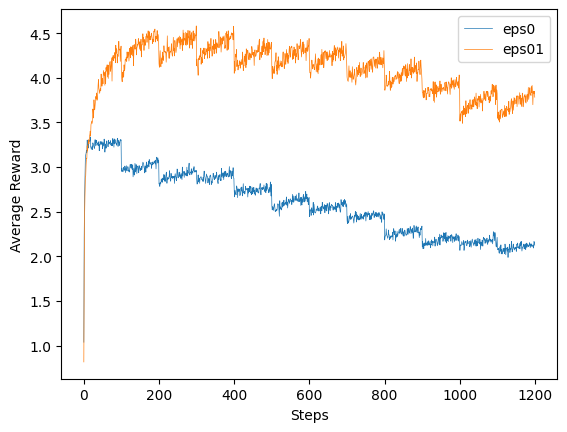

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.average(eps0_rewards, axis=0), linewidth=0.5, label="eps0")
ax.plot(np.average(eps01_rewards, axis=0), linewidth=0.5, label="eps01")
ax.set_ylabel('Average Reward')
ax.set_xlabel('Steps')
# plt.plot(rew)
ax.legend()
plt.show()

The bandit algorithm with exploration does better than the one without any exploration.

#### Values learned without any exploexploration.

True:  [-1.79424154 -3.12718892  1.82870586  5.8623072  -0.40637353  2.09217045
  0.58100755 -0.73293954  2.3004073  -3.57969969]
Esp0: [ 0.         -2.39975981  0.          0.          0.          0.
  1.28887664  0.          0.          0.        ]


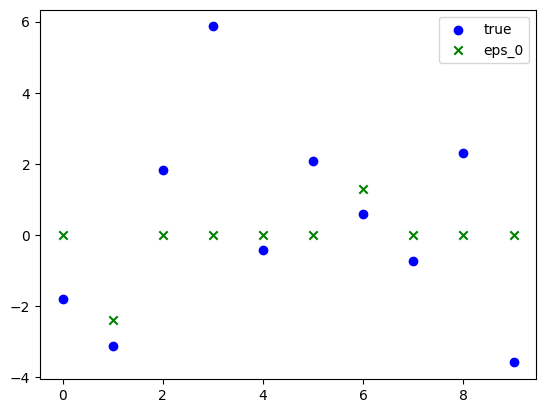

In [23]:
env = Dynamic_Machines(10)
esp0_Q, _, _ = simple_bandit(env, 1199)

print("True: ", env.means)
print("Esp0:", esp0_Q)

plt.scatter(range(env.k), env.means, color='blue', marker='o', label='true')
plt.scatter(range(env.k), esp0_Q, color='green', marker='x', label='eps_0')
plt.legend()

#### Values learned with exploration.

True:  [-1.36172484  2.90459651  2.24243698  0.25132399 -0.06636663  2.26100254
  5.41916013  5.79752099 -0.81533501 -2.25620714]
Esp01: [-1.16999871  3.73085402  2.43680931 -0.75870697 -0.09720709  3.2627651
  5.3894754   2.82864621 -0.74184992 -0.10346967]


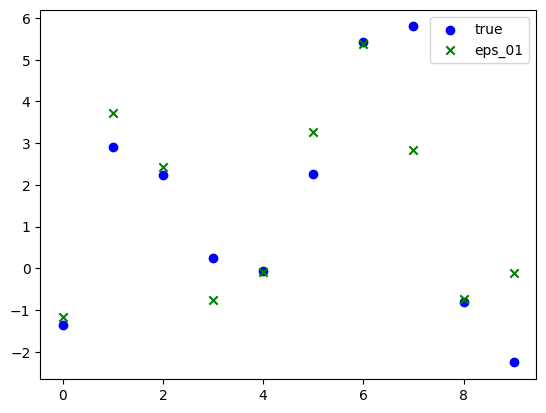

In [25]:
env = Dynamic_Machines(10)
esp01_Q, _, _ = simple_bandit(env, 1199, eps=0.1)


print("True: ", env.means)
print("Esp01:", esp01_Q)


plt.scatter(range(env.k), env.means, color='blue', marker='o', label='true')
plt.scatter(range(env.k), esp01_Q, color='green', marker='x', label='eps_01')
plt.legend()

### Bandit with constant Step Size

In [26]:
def alpha_bandit(env, steps, alpha=0.1, eps=0):
    """
    Bandit following simple epsilon-greedy algorithm, with constant step size.
    """
    Q = np.zeros(env.k) # average
    N = np.zeros(env.k) # numbers

    reward_hist = []
    action_hist = []

    for _ in range(steps):
        act = rand_argmax(Q) if np.random.random() >= eps else np.random.randint(0, env.k)
        rew = env.step(act)
        # print(act, ":", rew)

        N[act] += 1
        Q[act] += alpha * (rew - Q[act])

        reward_hist.append(rew)
        action_hist.append(act)

    return Q, np.array(reward_hist), np.array(action_hist)

In [27]:
env_0 = Dynamic_Machines(10)
env_1 = Dynamic_Machines(10)

eps0_rewards, eps0_acts = [], []
alpha_eps01_rewards, alpha_eps01_acts = [], []

for _ in range(1000):
    _, rew, acts = alpha_bandit(env_0, 1200, alpha=0.1)
    eps0_rewards.append(rew)
    eps0_acts.append(acts)

    _, rew, acts = alpha_bandit(env_1, 1200, alpha=0.1, eps=0.1)
    alpha_eps01_rewards.append(rew)
    alpha_eps01_acts.append(acts)

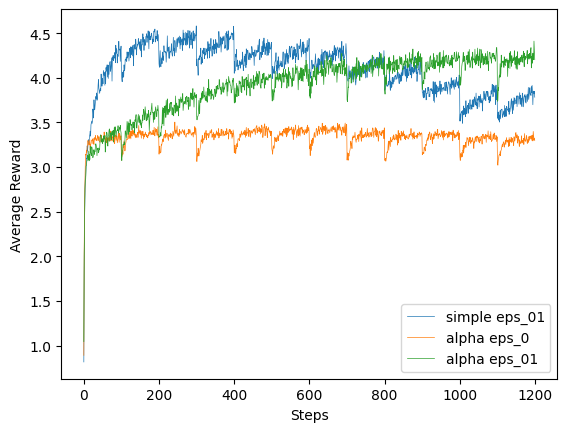

In [28]:
# plt.figure(figsize=(10, 6))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.average(eps01_rewards, axis=0), linewidth=0.5, label="simple eps_01")
ax.plot(np.average(eps0_rewards, axis=0), linewidth=0.5, label="alpha eps_0")
ax.plot(np.average(alpha_eps01_rewards, axis=0), linewidth=0.5, label="alpha eps_01")
ax.set_ylabel('Average Reward')
ax.set_xlabel('Steps')
ax.legend()
plt.show()

#### Constant step size is seems to be better than decreasing step size. Constant step size with little exploration is the only one with increasing average reward.

True:  [-2.79028428  1.36682646  0.44514578  1.04891417 -1.43193716 -3.77151982
  1.66960945  1.68734293  0.80231913  3.95865962]
Esp01: [-0.06772447  1.10295594  0.94313462 -0.13709305 -1.13671607 -2.21774424
  0.9860352   0.82113836  0.7159134   3.96341194]


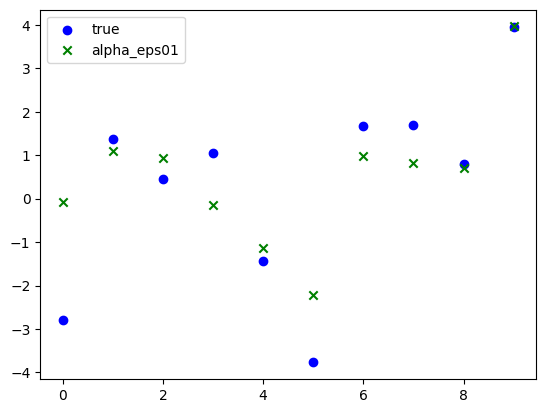

In [30]:
# esp0_Q, _, _ = simple_bandit(env, 5000)
env = Dynamic_Machines(10)
alpha_Q, _, _ = alpha_bandit(env, 1199, eps=0.1)

print("True: ", env.means)
print("Esp01:", alpha_Q)
plt.scatter(range(env.k), env.means, color='blue', marker='o', label='true')
plt.scatter(range(env.k), alpha_Q, color='green', marker='x', label='alpha_eps01')
plt.legend()

### UCB Bandit

In [31]:
def ucb_bandit(env, steps, c=1):
    """
    Bandit following UCB stratergy for action selection.
    """
    Q = np.zeros(env.k) # average
    N = np.zeros(env.k) # numbers

    reward_hist = []
    action_hist = []

    for a in range(env.k):
        N[a] = 1
        Q[a] = env.step(a)

        reward_hist.append(Q[a])
        action_hist.append(a)

    for t in range(env.k, steps):
        act = rand_argmax(Q + c * np.sqrt(np.log(t)/N))
        rew = env.step(act)

        N[act] += 1
        Q[act] += 1/N[act] * (rew - Q[act])

        reward_hist.append(rew)
        action_hist.append(act)

    return Q, np.array(reward_hist), np.array(action_hist)

In [44]:
env_1 = Dynamic_Machines(10)
env_2 = Dynamic_Machines(10)
env_3 = Dynamic_Machines(10)

ucb_rewards, ucb_acts = [], []
ucb3_rewards, ucb3_acts = [], []
ucb10_rewards, ucb10_acts = [], []

for _ in range(1000):
    _, rew, acts = ucb_bandit(env_1, 1200, c=2)
    ucb_rewards.append(rew)
    ucb_acts.append(acts)

    _, rew, acts = ucb_bandit(env_2, 1200, c=3)
    ucb3_rewards.append(rew)
    ucb3_acts.append(acts)

    _, rew, acts = ucb_bandit(env_3, 1200, c=10)
    ucb10_rewards.append(rew)
    ucb10_acts.append(acts)

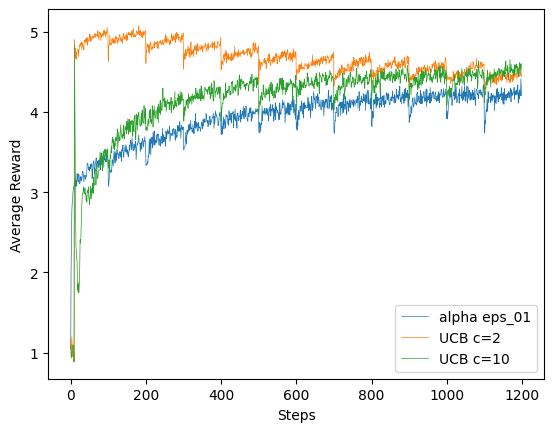

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.average(alpha_eps01_rewards, axis=0), linewidth=0.5, label="alpha eps_01")
ax.plot(np.average(ucb_rewards, axis=0), linewidth=0.5, label="UCB c=2")
ax.plot(np.average(ucb10_rewards, axis=0), linewidth=0.5, label="UCB c=10")
ax.set_ylabel('Average Reward')
ax.set_xlabel('Steps')
ax.legend()

plt.show()

#### UCB does better at start but as number of steps increases it's performance starts deteriorating. This is expected as N(a) also increases with steps so 'a' is less likely to be selected for exploration. On the other hand as number of steps increases it becomes more likely that the reward for an action 'a' has been changed.

True:  [-3.93446677  2.1468807   2.91774548  5.21235455 -3.44209616 -0.57770086
  5.09187469  2.89933394  4.29779728  2.39940981]
Esp01: [-0.24632259  1.66855869  2.70254026  5.095699   -3.06022717 -0.28316797
  4.85209211  4.79967123  3.45325609  2.27553604]


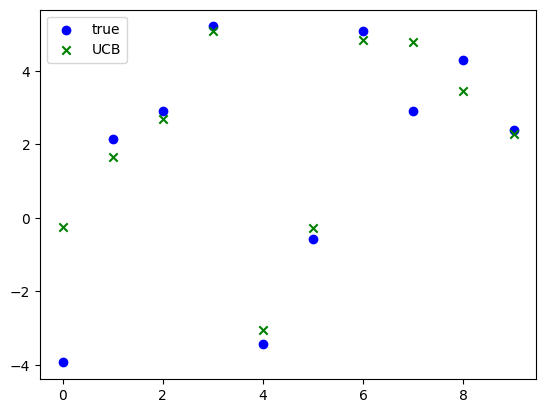

In [63]:
env = Dynamic_Machines(10)
ucb_Q, _, _ = ucb_bandit(env, 1199, c=10)

print("True: ", env.means)
print("Esp01:", ucb_Q)

plt.scatter(range(env.k), env.means, color='blue', marker='o', label='true')
plt.scatter(range(env.k), ucb_Q, color='green', marker='x', label='UCB')
plt.legend()